In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import pickle

In [2]:
df=pd.read_csv("steam.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
appid               27075 non-null int64
name                27075 non-null object
release_date        27075 non-null object
english             27075 non-null int64
developer           27075 non-null object
publisher           27075 non-null object
platforms           27075 non-null object
required_age        27075 non-null int64
categories          27075 non-null object
genres              27075 non-null object
steamspy_tags       27075 non-null object
achievements        27075 non-null int64
positive_ratings    27075 non-null int64
negative_ratings    27075 non-null int64
average_playtime    27075 non-null int64
median_playtime     27075 non-null int64
owners              27075 non-null object
price               27075 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.7+ MB
None


In [4]:
nm=LabelEncoder()
df["name"]=nm.fit_transform(df["name"])

rd=LabelEncoder()
df["release_date"]=rd.fit_transform(df["release_date"])

dp=LabelEncoder()
df["developer"]=dp.fit_transform(df["developer"])

pb=LabelEncoder()
df["publisher"]=pb.fit_transform(df["publisher"])

on=LabelEncoder()
df["owners"]=on.fit_transform(df["owners"])

pt_enc=LabelEncoder()
df["platforms"]=pt_enc.fit_transform(df["platforms"])

ct_enc=LabelEncoder()
df["categories"]=ct_enc.fit_transform(df["categories"])

gn_enc=LabelEncoder()
df["genres"]=gn_enc.fit_transform(df["genres"])

st_enc=LabelEncoder()
df["steamspy_tags"]=st_enc.fit_transform(df["steamspy_tags"])

In [5]:
X=df.iloc[:,:-1]
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [6]:
pca_features=PCA(n_components=2)
important_cols=pca_features.fit_transform(X)

In [7]:
final=pd.DataFrame(important_cols, columns= ["component1","component2"])



In [8]:
final.head()

component1  component2
0    6.860543    6.453627
1    3.935251   -1.108709
2    4.203931   -1.351306
3    3.957519   -1.262704
4    4.567153   -1.625641

In [9]:
X=final[["component1","component2"]]

In [10]:
# get all the WCSS pf different models with different values of k
wcss=[]
for k in range (1,11):
    model=KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)
print("WCSS",wcss)


WCSS [121492.79157403579, 76197.59239112808, 41066.873209706115, 30758.694757723977, 20683.978739341856, 16557.74931188182, 13652.50276318083, 11671.761004661133, 10176.49614510508, 9001.225621382258]


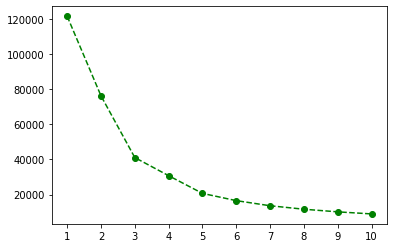

In [11]:
x=range(1,11)
y=wcss.copy()
plt.plot(x,y,"g--o")
plt.xticks(x)
plt.show()

In [12]:
k=5
cl_model=KMeans(n_clusters=k)
cl_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
pred=cl_model.predict(X)

In [14]:
final["Category"]=pred

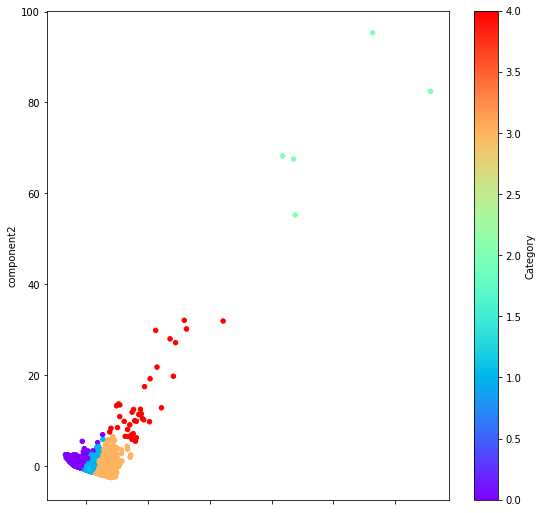

In [15]:
final.plot(kind="scatter",x="component1",y="component2",c="Category",figsize=(9,9),cmap="rainbow")
plt.show()

### Save the model

In [16]:
def save_model(model,path):
    with open(path,"wb") as file:
        pickle.dump(model,file)
    print("File saved")

In [18]:
save_model(cl_model,"Model/cluster_model.pk")

File saved
